In [1]:
from quspin.operators import hamiltonian
from quspin.basis import spin_basis_general, tensor_basis
from quspin.tools.measurements import obs_vs_time
import numpy as np
from matplotlib import pyplot as plt
from numpy.linalg import norm

In [2]:
#constant parameters
N  = 1      #system size
V  = 1.0    #coupling strength

S1 = '5/2' #spin of 1
S2 = '1/2'  #spin of 2

#just initializing
h1 = [0,0,0] #hx_1 = h1[0], etc
h2 = [0,0,0]
J1 = [0,0,0] #Jx_1 = J1[0], etc
J2 = [0,0,0]

#L1 = ?     #lambda prefix?
#L2 = ?

interesting parameter combos:

s1=5/2, s2=1/2, h1=1.9, h2=0.1

s1=3/2, s2=1/2, h1=0.1, h2=0.9

s1=1/2, s2=1/2, h1=0.1, h2=0

s1=1/2, s2=1/2, h1=0.1, h2=0.9

In [3]:
def makeBasis(N, S1, S2):
    basis1 = spin_basis_general(N=N, S=S1)
    basis2 = spin_basis_general(N=N, S=S2)
    basis  = tensor_basis(basis1, basis2)
    return basis

def spinOps(h1, h2, theta, phi, basis):    
    mag1   = norm(h1)
    mag2   = norm(h2)
    
    zComp1 = mag1*np.cos(theta)               #static comp. for 1
    xComp1 = mag1*np.sin(theta)*np.cos(phi)
    yComp1 = mag1*np.sin(theta)*np.sin(phi)
        
    minus1 = [xComp1/2 - 1j*yComp1/2, 0]
    plus1  = [xComp1/2 + 1j*yComp1/2, 0]
    
    zComp2 = mag2*np.cos(theta)               #static comp. for 2
    xComp2 = mag2*np.sin(theta)*np.cos(phi)
    yComp2 = mag2*np.sin(theta)*np.sin(phi)
    
    minus2 = [xComp2/2 - 1j*yComp2/2, 0]
    plus2  = [xComp2/2 + 1j*yComp2/2, 0]
    
    static1 = [
        ["z|",[[zComp1, 0]]],   #z comp 1
        ["-|", [minus1]],       #- op 1
        ["+|", [plus1]],        #+ op 1
    ]
    
    static2 =  [
        ["|z",[[zComp2, 0]]],   #z comp 2
        ["|-", [minus2]],       #- op 2
        ["|+", [plus2]]         #+ op 2
    ]
    
    H1 = hamiltonian(static1, [], dtype=np.complex128, basis=basis) #to make operators for 1
    H2 = hamiltonian(static2, [], dtype=np.complex128, basis=basis) #to make operators for 2
    
    return H1, H2

def H_ini(h1, h2, J1, J2):
    return -np.dot(h1, J1) - np.dot(h2, J2)

In [4]:
def getJs(N, S1, S2, h1, h2):
    basis = makeBasis(N, S1, S2)
    
    Jx_1, Jx_2 = spinOps(h1, h2, np.pi/2, 0, basis)
    Jy_1, Jy_2 = spinOps(h1, h2, np.pi/2, np.pi/2, basis)
    Jz_1, Jz_2 = spinOps(h1, h2, 0, 0, basis)
    
    J1 = [Jx_1, Jy_1, Jz_1] #storing them for later -> H_ini
    J2 = [Jx_2, Jy_2, Jz_2]
    
    return J1, J2

In [5]:
#H = -(h1)*(J1) - (h)*(J2) + [Jzz_1] + [Jzz_2] + V*Jz_1*Jz_2

Jzz_1, Jzz_2 = 0, 0 #??? (Jz_1)^2, (Jz_2)^2

Hermiticity check passed!


C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:37: UserWarning: Test for symmetries not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_symm=False in hamiltonian
C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:37: UserWarning: Test for particle conservation not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_pcon=False in hamiltonian


Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!
Hermiticity check passed!


C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:38: UserWarning: Test for symmetries not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_symm=False in hamiltonian
C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:38: UserWarning: Test for particle conservation not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_pcon=False in hamiltonian
C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:37: UserWarning: Test for symmetries not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_symm=False in hamiltonian
C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\ipykernel_launcher.py:37: UserWarning: Test for particle conservation not implemented for <class 'quspin.basis.tensor.tensor_basis'>, to turn off this warning set check_pcon=False in hamiltonian
C:\Use

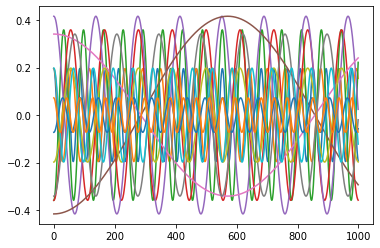

In [6]:
h1 = [4,3,1]
h2 = [2,0,0]

J1, J2 = getJs(N, S1, S2, h1, h2)

H1 = H_ini(h1, h2, J1, J2)
vals, vects = H1.eigh()

H2 = H_ini([0,0,1], [0,0,1], J1, J2)
times = np.linspace(0.0, 10.0, 1000)

v_t = H2.evolve(vects[0], t0=0, times=times)

plt.plot(v_t.T)

dict_keys(['Jx_1', 'Jy_1', 'Jz_1', 'Jx_2', 'Jy_2', 'Jz_2', 'psi_t'])


C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\Rey\AppData\Roaming\Python\Python36\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


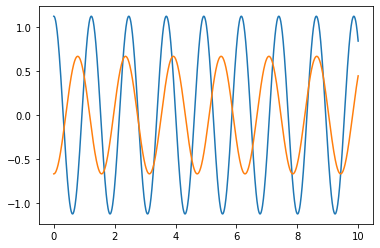

In [7]:
Obs_time = obs_vs_time(v_t, times, {'Jx_1':J1[0],
                                    'Jy_1':J1[1],
                                    'Jz_1':J1[2], 
                                    'Jx_2':J2[0],
                                    'Jy_2':J2[1],
                                    'Jz_2':J2[2]}, return_state=True)
print(Obs_time.keys())

Jx_1_time=Obs_time['Jx_1']
Jy_1_time=Obs_time['Jy_1']
Jz_1_time=Obs_time['Jz_1']

Jx_2_time=Obs_time['Jx_2']
Jy_2_time=Obs_time['Jy_2']
Jz_2_time=Obs_time['Jz_2']

#psi_time=Obs_time['psi_t']

plt.plot(times, Jx_1_time)
plt.plot(times, Jx_2_time)